## Embedding in $d=1$ (one pattern, $p=1$)

~~Start the neurons close to the known fixed point $\xi^1_i$~~

Actually it looks like if there are enough neurons, we can just start them from zero

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt, matplotlib.animation as animation
import numpy as np
from neurodyn import *

In [4]:
rnn = LowRankRNN.new_valentin(p=1, N=50_000, phi=sigmoid, I_ext=zero, exclude_self_connections=True)
res = rnn.simulate(h0=np.zeros(rnn.N), t_span=(0, 40), dt_max=1, progress=True)

simulating LowRankRNN{N=50000, p=1, phi=sigmoid, I_ext=zero, exclude_self_connections=True}: 100.00%|██████████| t=40.000 of 40 [00:03<00:00]


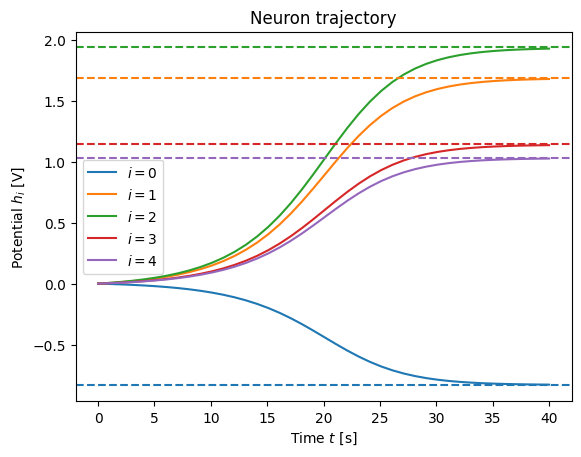

In [5]:
fig, ax = plot_neuron_trajectory(res)
for line, i in zip(ax.lines, range(5)):
	ax.axhline(rnn.F[i, 0], linestyle='--', color=line.get_color())

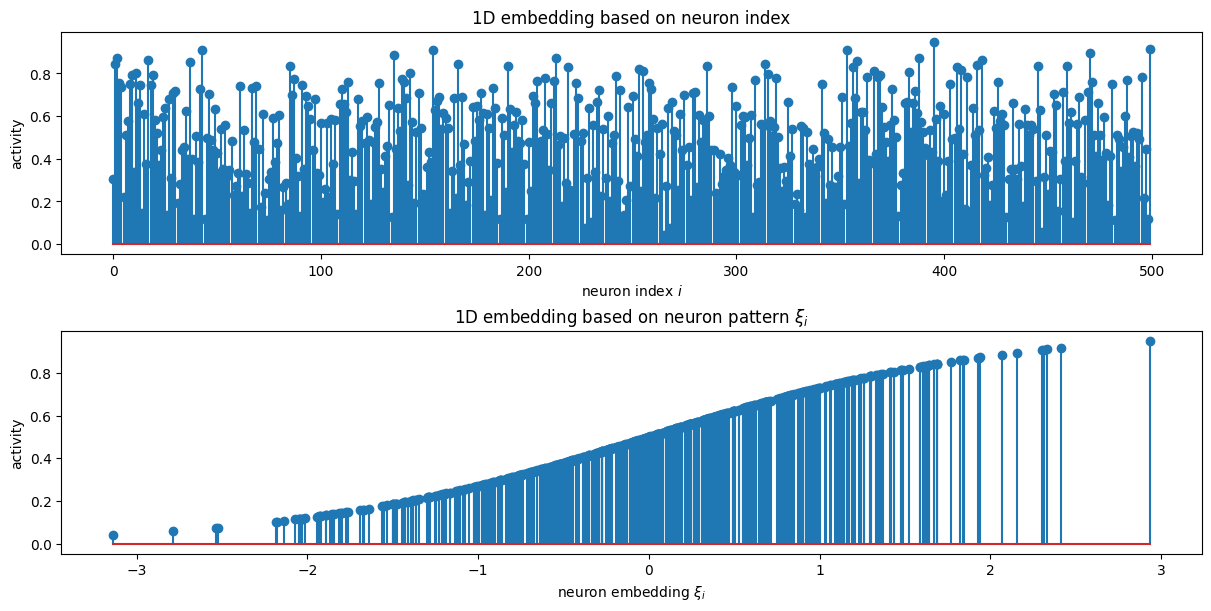

In [7]:
# we plot only the first 500 neurons because otherwise it gets really slow

fig, ax = plt.subplots(figsize=(12, 6), nrows=2, constrained_layout=True)

ax[0].set_title('1D embedding based on neuron index')
ax[0].stem(np.arange(len(res.h[:500, -1])), rnn.phi(res.h[:500, -1]))
ax[0].set_xlabel('neuron index $i$')
ax[0].set_ylabel('activity')

# at the fixed point, all neurons are in state Xi_i, so the activity follows Phi(Xi)
ax[1].set_title('1D embedding based on neuron pattern $\\xi_i$')
ax[1].stem(rnn.F[:500, 0], rnn.phi(res.h[:500, -1]))
ax[1].set_xlabel('neuron embedding $\\xi_i$')
ax[1].set_ylabel('activity')

plt.show()

In [ ]:
# TODO : clean this up, put the animation in plot.py

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6), nrows=2, constrained_layout=True)
Nmax = 256

ax[0].set_title('1D embedding based on neuron index')
stem1 = ax[0].stem(np.arange(len(res.h[:Nmax, 0])), rnn.phi(res.h[:Nmax, 0]))
ax[0].set_xlabel('neuron index $i$')
ax[0].set_ylabel('activity')
ax[0].set_ylim((0, 1))

ax[1].set_title('1D embedding based on neuron pattern $\\xi_i$')
stem2 = ax[1].stem(rnn.F[:Nmax, 0], rnn.phi(res.h[:Nmax, 0]))
ax[1].set_xlabel('neuron embedding $\\xi_i$')
ax[1].set_ylabel('activity')
ax[1].set_ylim((0, 1))

def update(idt: int):
	print(idt)
	activity = rnn.phi(res.h[:Nmax, idt])
	embed_index = np.arange(len(res.h[:Nmax, 0]))
	embed_gauss = rnn.F[:Nmax, 0]
	stem1.markerline.set_ydata(activity)
	stem2.markerline.set_ydata(activity)
	stem1.stemlines.set_paths([np.array([[x, 0], [x, y]]) for x, y in zip(embed_index, activity)])
	stem2.stemlines.set_paths([np.array([[x, 0], [x, y]]) for x, y in zip(embed_gauss, activity)])
	# return *stem1, *stem2

ani = animation.FuncAnimation(fig, update, frames=range(0, len(res.t), 10))
ani.save('animations/d=1 embedding.mp4', writer='ffmpeg', fps=15)

plt.close(fig)

0
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400


In [ ]:
# TODO : to drive the point home, also implement with phi=identity or linear